In [1]:
import numpy as np
from qutip import *
from scipy.optimize import minimize
from scipy.sparse.linalg import expm


In [2]:
Hdrift = sigmaz().full()
Hctrls = [sigmax().full(),sigmay().full()]
init = fock(2,0).full()
target = fock(2,1).full()
dt = 1
lengthOfControl = 20

numberOfControls = len(Hctrls)
initControlAmplitudes = np.random.rand(numberOfControls, lengthOfControl)

def cost(controlAmplitudes):
    """Computes the cost function from the control signals.

    Args:
        controlAmplitudes (array): 
            An array with shape [numberOfControls, lengthOfControl].
            It will be flattened by `scipy.optimize.minimize` to shape 
            (numberOfControls*lengthOfControl,) automatically.
            
    Returns:
        The cost (float). For example:

        0.01
        
    """
    U = qeye(2)
    for index1 in range(lengthOfControl):
        Ht = Hdrift 
        for index0 in range(numberOfControls):
            index = index0 * lengthOfControl + index1
            Ht += Hctrls[index0] * controlAmplitudes[index]
        Ut = expm(-1j * Ht * dt)
        U = np.matmul(Ut, U)
    final = np.matmul(U, init)
    cost = np.sum(np.abs(final - target))
    return cost

minimizeResult = minimize(cost, initControlAmplitudes, method='L-BFGS-B')

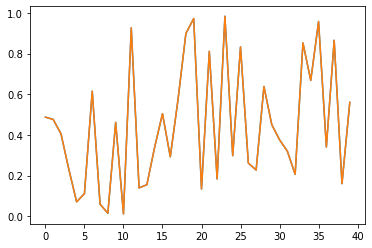

In [5]:
import matplotlib.pyplot as plt

x = minimizeResult.x

for index0 in range(numberOfControls):
    plt.plot(x)
plt.show()
